In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tensorflow.keras.preprocessing import image

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("warcoder/tyre-quality-classification")

print("Path to dataset files:", path)

100%|██████████| 2.66G/2.66G [00:35<00:00, 80.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/warcoder/tyre-quality-classification/versions/1


Found 1486 images belonging to 2 classes.
Found 370 images belonging to 2 classes.


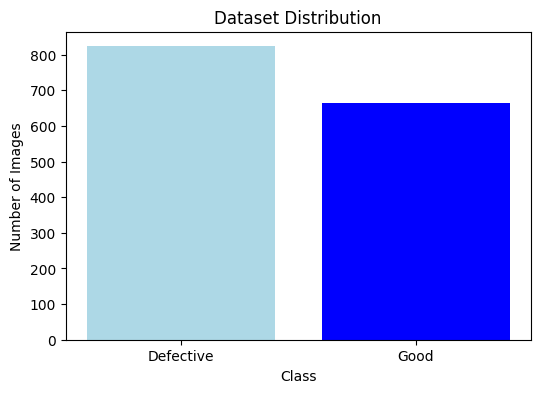

In [ ]:
DATASET_PATH = "/root/.cache/kagglehub/datasets/warcoder/tyre-quality-classification/versions/1/Digital images of defective and good condition tyres"
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

# Plot Dataset Distribution with Light Blue
labels = ['Defective', 'Good']
counts = [train_generator.classes.tolist().count(0), train_generator.classes.tolist().count(1)]

plt.figure(figsize=(6, 4))
plt.bar(labels, counts, color=['lightblue', 'blue'])  # Use light blue color
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Dataset Distribution")
plt.show()

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - accuracy: 0.5024 - loss: 0.7039 - val_accuracy: 0.5541 - val_loss: 0.6881
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.5324 - loss: 0.7016 - val_accuracy: 0.5541 - val_loss: 0.7000
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.5338 - loss: 0.7051 - val_accuracy: 0.5541 - val_loss: 0.6878
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step - accuracy: 0.5065 - loss: 0.6999 - val_accuracy: 0.5541 - val_loss: 0.6880
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.5325 - loss: 0.6994 - val_accuracy: 0.5541 - val_loss: 0.6911
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.5417 - loss: 0.6921 - val_accuracy: 0.5541 - val_loss: 0.6878
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.5489 - loss: 0.6886 - val_accuracy: 0.5541 - val_loss: 0.6878
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.5515 - loss: 0.6890 - val_accuracy: 0.5541 - val_loss

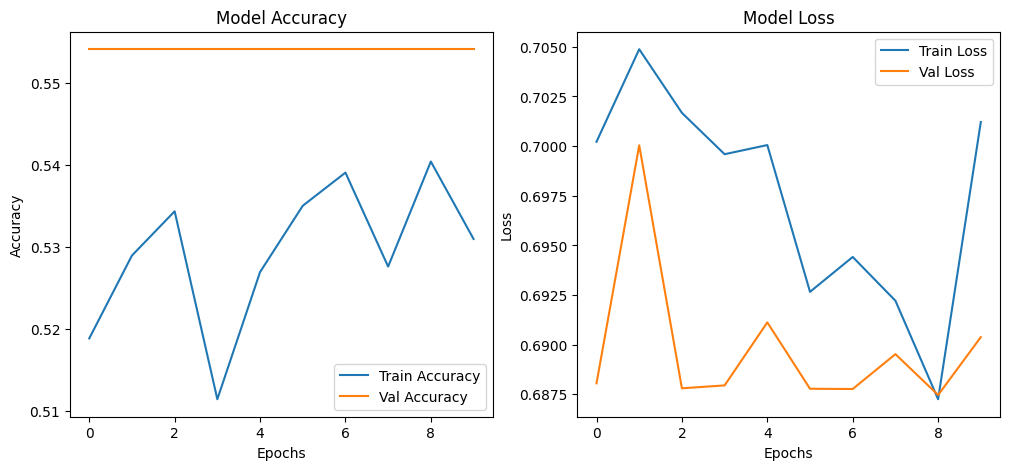

In [ ]:
# Step 3: Model Training
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

x = GlobalAveragePooling2D()(base_model.output)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_generator, validation_data=val_generator, epochs=10)

# Combine Training Histories
history_data = {
    'accuracy': history.history['accuracy'],
    'val_accuracy': history.history['val_accuracy'],
    'loss': history.history['loss'],
    'val_loss': history.history['val_loss']
}

# Plot Training Results
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history_data['accuracy'], label='Train Accuracy')
plt.plot(history_data['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history_data['loss'], label='Train Loss')
plt.plot(history_data['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()

12/12 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step
              precision    recall  f1-score   support

           0       0.55      1.00      0.71       205
           1       0.00      0.00      0.00       165

    accuracy                           0.55       370
   macro avg       0.28      0.50      0.36       370
weighted avg       0.31      0.55      0.40       370



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


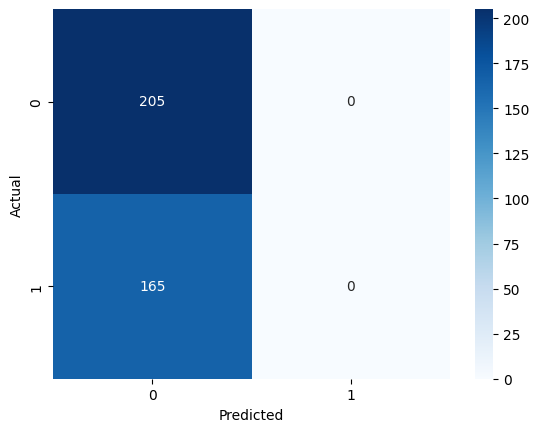

In [ ]:
# Step 4: Evaluation
val_labels = val_generator.classes
predictions = (model.predict(val_generator) > 0.5).astype('int32')

print(classification_report(val_labels, predictions))

conf_mat = confusion_matrix(val_labels, predictions)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
import os

dataset_path = "/root/.cache/kagglehub/datasets/warcoder/tyre-quality-classification/versions/1"

# Print all available folders and files in the dataset
for root, dirs, files in os.walk(dataset_path):
    print(f"📂 Folder: {root}")
    for file in files[:10]:  # Show only first 10 files
        print(f"📄 File: {file}")

📂 Folder: /root/.cache/kagglehub/datasets/warcoder/tyre-quality-classification/versions/1
📂 Folder: /root/.cache/kagglehub/datasets/warcoder/tyre-quality-classification/versions/1/Digital images of defective and good condition tyres
📂 Folder: /root/.cache/kagglehub/datasets/warcoder/tyre-quality-classification/versions/1/Digital images of defective and good condition tyres/good
📄 File: good (691).jpg
📄 File: good (733).jpg
📄 File: good (466).jpg
📄 File: good (354).jpg
📄 File: good (231).jpg
📄 File: good (321).jpg
📄 File: good (575).jpg
📄 File: good (638).jpg
📄 File: good (105).jpg
📄 File: good (349).jpg
📂 Folder: /root/.cache/kagglehub/datasets/warcoder/tyre-quality-classification/versions/1/Digital images of defective and good condition tyres/defective
📄 File: Defective (672).jpg
📄 File: Defective (45).jpg
📄 File: Defective (649).jpg
📄 File: Defective (865).jpg
📄 File: Defective (318).jpg
📄 File: Defective (25).jpg
📄 File: Defective (101).jpg
📄 File: Defective (683).jpg
📄 File: Defect

✅ Checking dataset structure...

📂 Folder: /root/.cache/kagglehub/datasets/warcoder/tyre-quality-classification/versions/1/Digital images of defective and good condition tyres
📂 Folder: /root/.cache/kagglehub/datasets/warcoder/tyre-quality-classification/versions/1/Digital images of defective and good condition tyres/good
📄 File: good (691).jpg
📄 File: good (733).jpg
📄 File: good (466).jpg
📄 File: good (354).jpg
📄 File: good (231).jpg
📂 Folder: /root/.cache/kagglehub/datasets/warcoder/tyre-quality-classification/versions/1/Digital images of defective and good condition tyres/defective
📄 File: Defective (672).jpg
📄 File: Defective (45).jpg
📄 File: Defective (649).jpg
📄 File: Defective (865).jpg
📄 File: Defective (318).jpg

✅ Using image for testing: /root/.cache/kagglehub/datasets/warcoder/tyre-quality-classification/versions/1/Digital images of defective and good condition tyres/defective/Defective (672).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


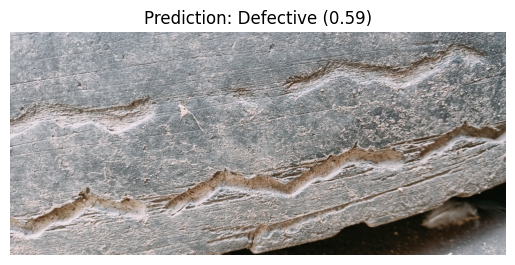

('Defective', 0.5856372)

In [ ]:
import os
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model

# 🔹 Step 1: Define Correct Dataset Path
DATASET_PATH = "/root/.cache/kagglehub/datasets/warcoder/tyre-quality-classification/versions/1/Digital images of defective and good condition tyres"

# 🔹 Step 2: Check Available Files
print("✅ Checking dataset structure...\n")
for root, dirs, files in os.walk(DATASET_PATH):
    print(f"📂 Folder: {root}")
    for file in files[:5]:  # Show first 5 files in each folder
        print(f"📄 File: {file}")

# 🔹 Step 3: Find a Valid Image File (From Defective Tyres Folder)
defective_images = glob.glob(DATASET_PATH + "/defective/*.jpg")  # Adjust extension if needed

if len(defective_images) == 0:
    raise FileNotFoundError("❌ No images found in the dataset! Check dataset path.")
else:
    test_img_path = defective_images[0]  # Select first available image
    print(f"\n✅ Using image for testing: {test_img_path}")

# 🔹 Step 4: Load Pretrained Model (EfficientNetB0)
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

x = GlobalAveragePooling2D()(base_model.output)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 🔹 Step 5: Function to Predict Tyre Condition
def predict_tyre_condition(img_path, model):
    """Loads an image, preprocesses it, and makes a prediction using the trained model."""

    if not os.path.exists(img_path):
        raise FileNotFoundError(f"❌ Image not found: {img_path}")

    # Load the image and resize
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize

    # Make prediction
    prediction = model.predict(img_array)[0][0]

    # Determine label
    class_label = "Defective" if prediction > 0.5 else "Good Condition"
    confidence = 1 - prediction if prediction < 0.5 else prediction  # Confidence score

    # Display the image with prediction
    img_cv = cv2.imread(img_path)
    img_cv = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)  # Convert to RGB
    plt.imshow(img_cv)
    plt.axis("off")
    plt.title(f"Prediction: {class_label} ({confidence:.2f})")
    plt.show()

    return class_label, confidence

# 🔹 Step 6: Run Prediction
predict_tyre_condition(test_img_path, model)

In [ ]:
import pickle
import tensorflow as tf
from tensorflow.keras.models import Model

# 🔹 Step 1: Train/Load Model (Ensure you have a trained model)
base_model = tf.keras.applications.EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
x = tf.keras.layers.Dropout(0.5)(x)
output = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 🔹 Step 2: Save Model as Pickle (Only for Non-TensorFlow Models)
pkl_filename = "tyre_quality_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)

print(f"✅ Model saved as: {pkl_filename}")

# 🔹 Step 3: Save Model as H5 (Recommended for TensorFlow Models)
h5_filename = "tyre_quality_model.h5"
model.save(h5_filename)
print(f"✅ TensorFlow Model saved as: {h5_filename}")

# 🔹 Step 4: Generate a Download Link for the Pickle Model
from google.colab import files

print("\n⬇️ Click below to download the `.pkl` model:")
files.download(pkl_filename)

print("\n⬇️ Click below to download the `.h5` model (recommended for TensorFlow models):")
files.download(h5_filename)

✅ Model saved as: tyre_quality_model.pkl
✅ TensorFlow Model saved as: tyre_quality_model.h5

⬇️ Click below to download the `.pkl` model:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


⬇️ Click below to download the `.h5` model (recommended for TensorFlow models):


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>